














# $$Computatipnal Physics lab-6$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ODE 1

In [2]:
def analytic(x):
    return (-5*x**2 + 8*x+4)

def dy_dx(x,y):
    return (2*y-18*x)/(1+x)

In [3]:
def euler(x0,y0,n,h,f):
    x=np.zeros(n)
    y=np.zeros(n)
    x[0]=x0
    y[0]=y0
    for i in range(n-1):
        x[i+1]=x[i]+h
        y[i+1]=y[i]+h*(f(x[i],y[i]))
    
    return x,y

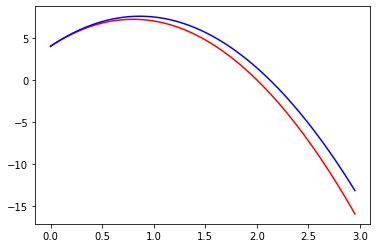

In [4]:
x_ana=np.arange(0,3,0.05)
y_ana=analytic(x_ana)
x_num,y_num=euler(0,4,60,0.05,dy_dx)

plt.plot(x_ana,y_ana,'red')
plt.plot(x_num,y_num,'blue')

**b)**

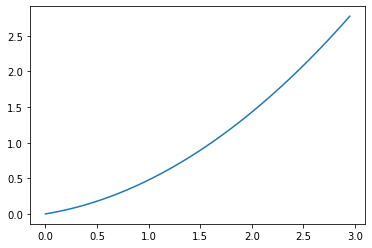

In [5]:
abs_err_euler=abs(y_ana-y_num)
plt.plot(x_ana,abs_err_euler)

# ODE 2(Not compulsory)

In [6]:
def dy_dx(x,theta,u0):
    return (np.tan(theta)-(9.8*(x)/((u0**2)*np.cos(theta)**2)))

def euler(x0,y0,h,f,theta,u0,n):
    x=np.zeros(n)
    y=np.zeros(n)
    x[0]=x0
    y[0]=y0
    for i in range(n-1):
        x[i+1]=x[i]+h
        y[i+1]=y[i]+h*(f(x[i],theta,u0))
        if(y[i+1]<1e-5):
            break
    
    return x,y

In [7]:
u0=700
theta=0

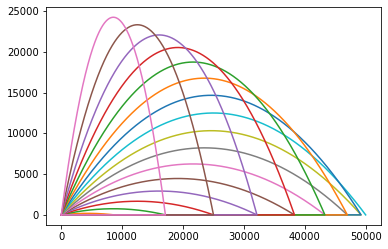

In [8]:
for i in range (17):
    x,y=euler(0,0,0.5,dy_dx,theta,u0,100000)
    plt.plot(x,y)
    theta+=np.pi*(5/180)

# Coupled ODE 1


While solving a set of M coupled ODEs the function ‘Eul’
may be extended to return an array $Y= Eul(F(x,y), x_0, y_0, h, N,M )$, where $Y$ is the M-dimensional array of solutions and $F$ is a M-dimensional array of RHS
functions for coupled ODEs. Using this modified function find the phase space
trajectory of a particle of unit mass in a potential $V(x)$. You need to solve the
Hamilton’s equations of the system, given by:
$$$$
$$\frac{dp}{dt}=-\frac{\partial H}{\partial x}$$
$$$$
$$\frac{dx}{dt}=\frac{\partial H}{\partial p}$$

# a)
Start by taking simple harmonic oscillator potential $V ( x )=\frac{1}{2}kx^2$,
$k=1 \frac{N}{m}$
What is the period $T$ of this oscillator? Use h=T/S with S=10, 100 and 1000 for
the step size and follow the trajectory over a time 10 T considering the initial
condition $(x, px) = (1.0, 0.0)$. For all the cases, compare the following
The time period $T=2\pi$

i) Show the trajectory i.e. x and p as functions of time and also the phase
space . Compare these with the analytical solutions.

**i)**

In [9]:
def dp_dt(x,p):
    return -x

def dx_dt(x,p):
    return p

def euler(x0,p0,h,n):
    p=np.zeros(n)
    x=np.zeros(n)
    t=np.zeros(n)
    x[0]=x0
    p[0]=p0
    t[0]=0
    for i in range(n-1):
        p[i+1]=p[i]+h*(dp_dt(x[i],p[i]))
        x[i+1]=x[i]+h*(dx_dt(x[i],p[i]))
        t[i+1]=t[i]+h
        
    return t,x,p

**S=10**

Text(0, 0.5, 'p')

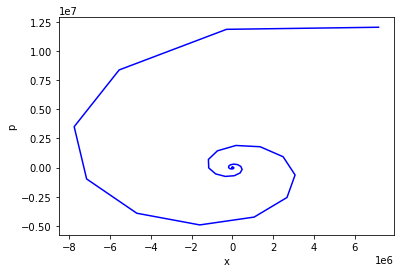

In [10]:
t1,x1,p1=euler(1,0,0.628,100)
plt.plot(x1,p1,'blue')
plt.xlabel("x")
plt.ylabel("p")

**S=100**

Text(0, 0.5, 'p')

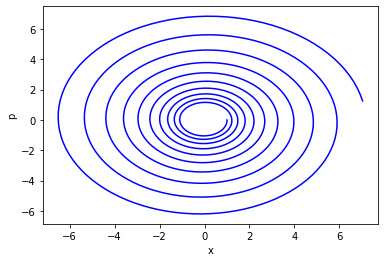

In [11]:
t2,x2,p2=euler(1,0,0.0628,1000)
plt.plot(x2,p2,'blue')
plt.xlabel("x")
plt.ylabel("p")

**S=1000**

Text(0, 0.5, 'p')

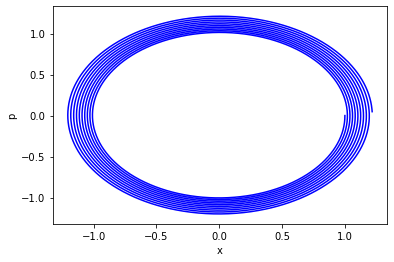

In [12]:
t3,x3,p3=euler(1,0,0.00628,10000)
plt.plot(x3,p3,'blue')
plt.xlabel("x")
plt.ylabel("p")

ii) plot 
$$\frac{dE}{E}=\frac{E_n-E}{E}$$ as a function of time, $E_n$ and $E$ are are respectively the
numerically calculated energy and the actual energy respectively.

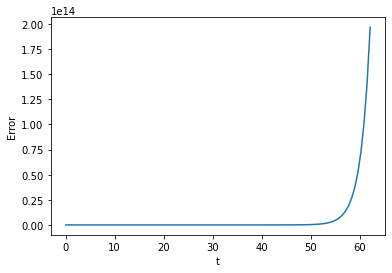

In [13]:
def E(x,p):
    return (x**2+p**2)/2

E1=E(x1,p1)
plt.xlabel("t")
plt.ylabel("Error")
plt.plot(t1,(E1-0.5)/0.5)


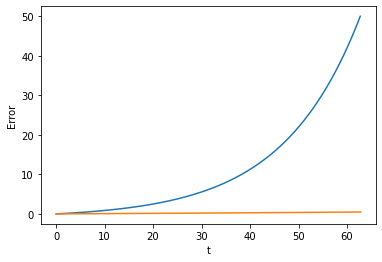

In [14]:
E2=E(x2,p2)
E3=E(x3,p3)
plt.xlabel("t")
plt.ylabel("Error")
plt.plot(t2,(E2-0.5)/0.5)
plt.plot(t3,(E3-0.5)/0.5)

# b)
Now consider a double well potential $V(x)=(x^2-1)^2$ $x=[-2,2]$.Considering phase space, plot the contours corresponding to different values of energy E. Analyse these to discuss the various kinds of trajectories possible in this potential.For this new potential, repeat the same exercises as in a. for initial conditions $$(x,p_x)=(1,0.1),(-1,0.1),(1,10)$$

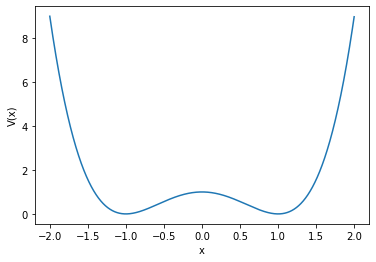

In [15]:
def V(x):
    return (x**2 -1)**2

x=np.arange(-2,2,0.001)
V=V(x)
plt.xlabel("x")
plt.ylabel("V(x)")
plt.plot(x,V)

In [16]:
def dp_dt(x,p):
    return -4*x*(x**2-1)

def dx_dt(x,p):
    return p

def euler(x0,p0,h,n):
    p=np.zeros(n)
    x=np.zeros(n)
    x[0]=x0
    p[0]=p0
    
    for i in range(n-1):
        p[i+1]=p[i]+h*(dp_dt(x[i],p[i]))
        x[i+1]=x[i]+h*(dx_dt(x[i],p[i]))
        
    return x,p

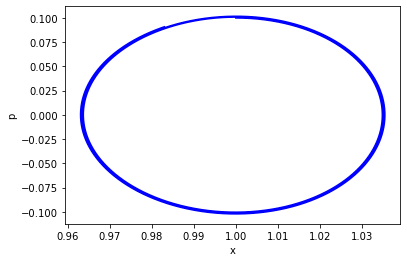

In [17]:
x1,p1=euler(1,0.1,0.001,6500)
plt.xlabel("x")
plt.ylabel("p")
plt.plot(x1,p1,'blue')

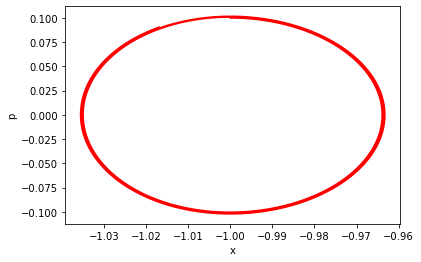

In [18]:
x2,p2=euler(-1,0.1,0.001,6500)
plt.xlabel("x")
plt.ylabel("p")
plt.plot(x2,p2,'red')

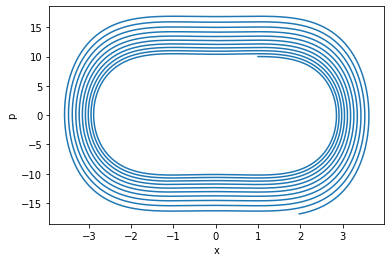

In [19]:
x3,p3=euler(1,10,0.002,6500)
plt.xlabel("x")
plt.ylabel("p")
plt.plot(x3,p3)

# RK 2nd Order

Define a function $RK2=(f(x,y),x_o,y_o,h,N)$ , which will return the solution of a ODE of the form $\frac{dy}{dx}=f(x,y)$ for $N$ steps of size $h$ using $2^{nd}$ oder Runge-Kutta (R-K) method.
Solve the ODE $(1+x)\frac{dy}{dx}-2y+18x=0$ whith $y(0)=4$ and increment $h=0.05$ in the
interval $(0, 3)$ by using function RK2. Compare this with the analytical solution and that from Euler’s method. Compare the absolute error in Energy with the results from the Euler’s method.

In [20]:
def dy_dx(x,y):
    return (2*y-18*x)/(x+1)
def analytic(x):
    return (-5*x**2+8*x+4)

In [21]:
def RK2(f,x0,y0,h,n):
    x=np.zeros(n)
    y=np.zeros(n)
    x[0]=x0
    y[0]=y0
    for i in range(1,n):
        s1=f(x[i-1],y[i-1])
        s2=f(x[i-1]+(h/2),y[i-1]+(h/2)*s1)
        y[i]=y[i-1]+(h)*(s2)
        x[i]=x[i-1]+h
        
    return x,y

In [22]:
x,y=RK2(dy_dx,0,4,0.05,60)
x_ana=np.arange(0,3,0.05)
y_ana=analytic(x_ana)

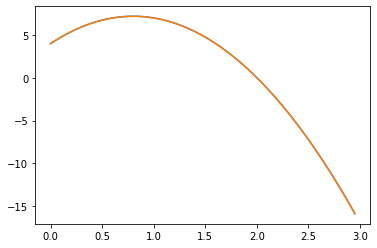

In [23]:
plt.plot(x,y)
plt.plot(x_ana,y_ana)

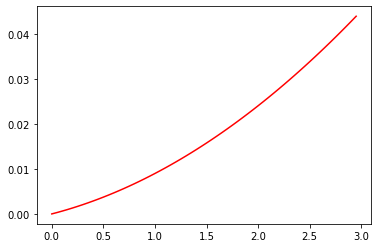

In [24]:
abs_err_rk2=abs(y-y_ana)
plt.plot(x,abs_err_rk2,'red')

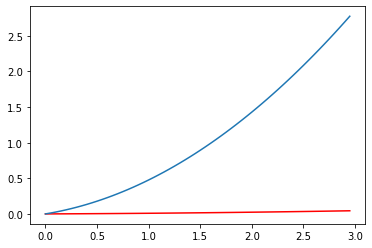

In [25]:
plt.plot(x,abs_err_rk2,'red')
plt.plot(x,abs_err_euler)

# Generalized RK2 for M Coupled equations

  For 2 coupled equations

In [26]:
def dy_dx(x,y,z):
    return -x-y*z

def dz_dx(x,y,z):
    return -y-(x*z)

In [27]:
def RK2(x0,y0,z0,h,n):
    x=np.zeros(n)
    y=np.zeros(n)
    z=np.zeros(n)
    x[0]=0
    y[0]=0
    z[0]=1
    for i in range (1,n):
        sy1=dy_dx(x[i-1],y[i-1],z[i-1])
        sz1=dz_dx(x[i-1],y[i-1],z[i-1])

        sy2=dy_dx(x[i-1]+(h/2),y[i-1]+(h/2)*sy1,z[i-1]+(h/2)*sz1)
        sz2=dz_dx(x[i-1]+(h/2),y[i-1]+(h/2)*sy1,z[i-1]+(h/2)*sz1)

        y[i]=y[i-1]+(h)*(sy2)
        z[i]=z[i-1]+(h)*(sz2)
        x[i]=x[i-1]+h
        
    return x,y,z

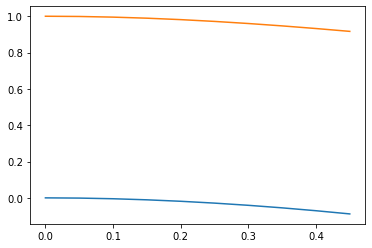

In [28]:
x,y,z=RK2(0,0,1,0.05,10)
plt.plot(x,y)
plt.plot(x,z)

For any M coupled equations

In [29]:
"M sized array of functions dF/dx"
def dF(x,Y):
    F=np.array([-x-Y[0]*Y[1],-Y[0]-(x*Y[1])])
    return F   

In [30]:
def RK2G(F,m,x0,Y0,h,n):
    x=np.zeros(n)
    Y=np.zeros((n,m))
    x[0]=x0
    Y[0]=Y0
    for i in range (1,n):
        
        S1=F(x[i-1],Y[i-1])
        S2=F(x[i-1]+(h/2),Y[i-1]+S1*(h/2))
        
        Y[i]=Y[i-1]+(h*S2)
        x[i]=x[i-1]+h
    
    return x,Y

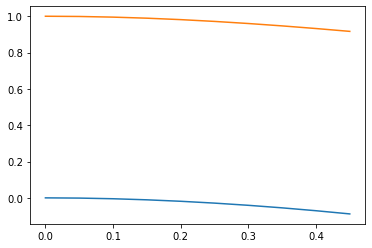

In [31]:
Y0=np.array([0,1])
x,Y=RK2G(dF,2,0,Y0,0.05,10)

plt.plot(x,Y[:,0])
plt.plot(x,Y[:,1])

# Coupled equation 4

Write a program to follow the motion of an electron (e) in
an electric field $E(x, t)$ and a magnetic field $B(x, t)$. Numerically determine the trajectory of an electron for 1 micro second with 1 nano second of time resolution by solving Lorentz force equation:
$$m\frac{d\vec{v}}{dt}=q(\vec{E}+\vec{v}\vec{B})$$
Assume that the particle starts at the origin with velocity $v = (1.0, 1.0, 1.0)
m/sec$ for the following field configurations:

**I) Uniform magnetic field $10^{-4}$ Tesla along the z-axis.**

In [32]:
"The coupled differential equations"

def dvx_dt(vx,vy,vz):
    return -1.75*(10**7)*vy

def dvy_dt(vx,vy,vz):
    return 1.75*(10**7)*vx

def dvz_dt(vx,vy,vz):
    return 0

In [33]:
"We get the velocities as a function of time from here"

def solve(vx0,vy0,vz0,h,n):
    vx=np.zeros(n)
    vy=np.zeros(n)
    vz=np.zeros(n)
    t=np.zeros(n)
    vx[0]=vx0
    vy[0]=vy0
    vz[0]=vz0
    t[0]=0
    
    for i in range(1,n):
        svx1=dvx_dt(vx[i-1],vy[i-1],vz[i-1])
        svy1=dvy_dt(vx[i-1],vy[i-1],vz[i-1])
        svz1=dvz_dt(vx[i-1],vy[i-1],vz[i-1])
        
        svx2=dvx_dt(vx[i-1]+(h/2)*svx1,vy[i-1]+(h/2)*svy1,vz[i-1]+(h/2)*svz1)
        svy2=dvy_dt(vx[i-1]+(h/2)*svx1,vy[i-1]+(h/2)*svy1,vz[i-1]+(h/2)*svz1)
        svz2=dvz_dt(vx[i-1]+(h/2)*svx1,vy[i-1]+(h/2)*svy1,vz[i-1]+(h/2)*svz1)
        
        vx[i]=vx[i-1]+h*(svx2)
        vy[i]=vy[i-1]+h*(svy2)
        vz[i]=vz[i-1]+h*(svz2)
        t[i]=t[i-1]+h
        
    return t,vx,vy,vz

In [34]:
"Position from the velocities"

def pos(vx,vy,vz,n):
    x=np.zeros(n)
    y=np.zeros(n)
    z=np.zeros(n)
    x[0]=vx[0]
    y[0]=vy[0]
    z[0]=vz[0]
    
    for i in range(1,n):
        x[i]=x[i-1]+vx[i]
        y[i]=y[i-1]+vy[i]
        z[i]=z[i-1]+vz[i]
        
    return x*(10**(-9)),y*(10**(-9)),z*(10**(-9))

In [35]:
"Velocities as a function of time"
t,vx,vy,vz=solve(1,1,1,10**(-9),2000)

In [36]:
"Positions as a function of time"
x,y,z=pos(vx,vy,vz,1000)

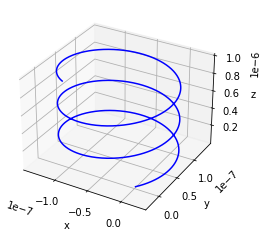

In [37]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z, 'blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()

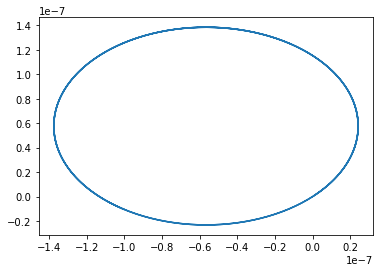

In [38]:
plt.plot(x,y)

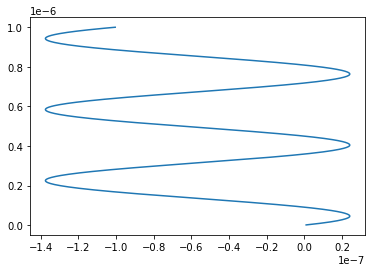

In [39]:
plt.plot(x,z)

**II)Uniform magnetic field $10^{-4}$ $Tesla$ along the z-axis and a uniform electric
field $1V/m$ along the y-axis**


In [40]:
"The coupled differential equations"

def dvx_dt(vx,vy,vz):
    return -1.75*(10**7)*vy

def dvy_dt(vx,vy,vz):
    return 1.75*(10**7)*vx-(1.75*(10**(11)))

def dvz_dt(vx,vy,vz):
    return 0


In [41]:
"We get the velocities as a function of time from here"

def solve(vx0,vy0,vz0,h,n):
    vx=np.zeros(n)
    vy=np.zeros(n)
    vz=np.zeros(n)
    t=np.zeros(n)
    vx[0]=vx0
    vy[0]=vy0
    vz[0]=vz0
    t[0]=0
    
    for i in range(1,n):
        svx1=dvx_dt(vx[i-1],vy[i-1],vz[i-1])
        svy1=dvy_dt(vx[i-1],vy[i-1],vz[i-1])
        svz1=dvz_dt(vx[i-1],vy[i-1],vz[i-1])
        
        svx2=dvx_dt(vx[i-1]+(h/2)*svx1,vy[i-1]+(h/2)*svy1,vz[i-1]+(h/2)*svz1)
        svy2=dvy_dt(vx[i-1]+(h/2)*svx1,vy[i-1]+(h/2)*svy1,vz[i-1]+(h/2)*svz1)
        svz2=dvz_dt(vx[i-1]+(h/2)*svx1,vy[i-1]+(h/2)*svy1,vz[i-1]+(h/2)*svz1)
        
        vx[i]=vx[i-1]+h*(svx2)
        vy[i]=vy[i-1]+h*(svy2)
        vz[i]=vz[i-1]+h*(svz2)
        t[i]=t[i-1]+h
        
    return t,vx,vy,vz

In [42]:
"Position from the velocities"

def pos(vx,vy,vz,n):
    x=np.zeros(n)
    y=np.zeros(n)
    z=np.zeros(n)
    x[0]=vx[0]
    y[0]=vy[0]
    z[0]=vz[0]
    
    for i in range(1,n):
        x[i]=x[i-1]+vx[i]
        y[i]=y[i-1]+vy[i]
        z[i]=z[i-1]+vz[i]
        
    return x*(10**(-9)),y*(10**(-9)),z*(10**(-9))

In [43]:
"Velocities as a function of time"
t,vx,vy,vz=solve(1,1,1,10**(-9),2000)

In [44]:
"Positions as a function of time"
x,y,z=pos(vx,vy,vz,1000)

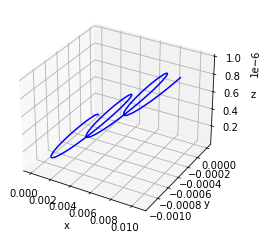

In [45]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z, 'blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

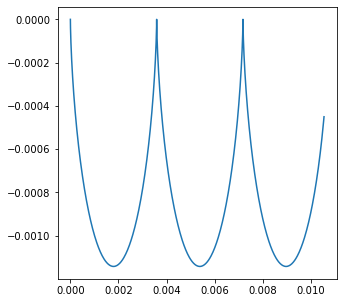

In [46]:
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(x,y)

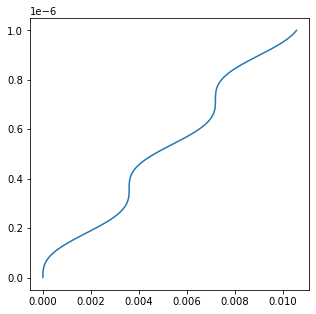

In [47]:
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(x,z)